In this work, you are required to train a model for dataset MNIST with PyTorch.

Load dataset:

In [27]:
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms

# Define the transformation for resnet
transform = transforms.Compose(
    [
        transforms.Resize((32, 32)),  # Resize the images
        transforms.Grayscale(num_output_channels=3),  # Convert to RGB
        transforms.ToTensor(),  # Convert to tensor
    ]
)


train_data = MNIST(
    root="../01BLITZ/data",
    download=True,
    train=True,
    transform=transform,
)
test_data = MNIST(
    root="../01BLITZ/data",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

Model: you may select your favorite model and implement it in the following class.

Evaluation: you need to implement a pipeline to train your neural network.

```python
class Model:
    # Your code here
    pass
    # End code here


model = Model()
optimizer = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()
for epoch in range(epochs):
    # Your code here
    pass
    # End code here
```

In [28]:
import torchvision.models as models


class ResNetModel(nn.Module):
    def __init__(self):
        super(ResNetModel, self).__init__()
        self.resnet = models.resnet18(
            weights=torchvision.models.ResNet18_Weights.DEFAULT
        )
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 10)

    def forward(self, x):
        x = self.resnet(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = ResNetModel().to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

cuda


In [31]:
import matplotlib.pyplot as plt


class TrainTest:
    def __init__(
        self,
        model,
        train_dataloader,
        test_dataloader,
        epochs,
        optimizer,
        loss_func,
        device,
        show_figure=True,
    ):
        self.model = model.to(device)
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.epochs = epochs
        self.device = device
        self.show_figure = show_figure
        self.optimizer = optimizer
        self.loss_func = loss_func
        self.train_losses = []
        self.test_losses = []
        self.accuracies = []
        # Create a figure and a set of subplots
        self.fig, self.ax1 = plt.subplots()
        self.ax2 = self.ax1.twinx()

        # Create line objects for Training Loss, Test Loss, and Accuracy
        (self.line1,) = self.ax1.plot([], [], "b", label="Training Loss")
        (self.line2,) = self.ax1.plot([], [], "r", label="Test Loss")
        (self.line3,) = self.ax2.plot([], [], "g", label="Accuracy")

    def train(self):
        for epoch in range(self.epochs):
            train_loss = 0.0
            test_loss = 0.0
            correct = 0
            total = 0
            # Training phase
            self.model.train()
            for inputs, labels in train_dataloader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.loss_func(outputs, labels)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item() * inputs.size(0)
            # Test phase
            self.model.eval()
            with torch.no_grad():
                for inputs, labels in test_dataloader:
                    inputs, labels = inputs.to(self.device), labels.to(self.device)
                    outputs = self.model(inputs)
                    loss = self.loss_func(outputs, labels)
                    test_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            # Calculate average losses and accuracy
            train_loss = train_loss / len(train_dataloader.dataset)
            test_loss = test_loss / len(test_dataloader.dataset)
            accuracy = 100 * correct / total

            # Store average losses and accuracy for plotting
            self.train_losses.append(train_loss)
            self.test_losses.append(test_loss)
            self.accuracies.append(accuracy)
            # Update the plot
            if self.show_figure:
                self.update_plot(epoch)

            # Print losses and accuracy
            print(
                f"Epoch: {epoch+1}/{self.epochs}.. \nTraining Loss: {train_loss}.. \nTest Loss: {test_loss}.. \nAccuracy: {accuracy}%"
            )

    def update_plot(self, epoch):
        clear_output(wait=True) # Clear the previous graph
        # Update the data of the line objects
        self.line1.set_ydata(self.train_losses)
        self.line1.set_xdata(range(epoch + 1))
        self.line2.set_ydata(self.test_losses)
        self.line2.set_xdata(range(epoch + 1))
        self.line3.set_ydata(self.accuracies)
        self.line3.set_xdata(range(epoch + 1))

        # Rescale the y-axes based on the updated data
        self.ax1.relim()
        self.ax1.autoscale_view()
        self.ax1.set_ylabel("Loss")
        self.ax2.relim()
        self.ax2.autoscale_view()
        self.ax2.set_ylabel("Accuracy", color="g")
        # add the legend
        self.ax1.legend(loc="lower left")
        # Redraw the figure
        self.fig.canvas.draw()
        plt.show()

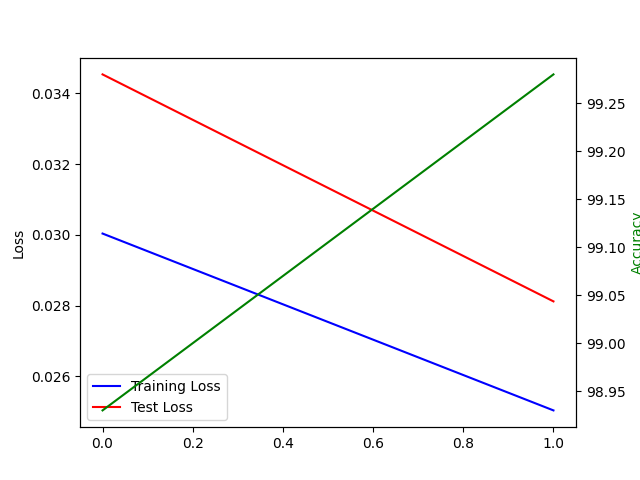

Epoch: 2/4.. 
Training Loss: 0.025033873098948972.. 
Test Loss: 0.02811695335592376.. 
Accuracy: 99.28%


In [32]:
TrainTest(
    model, train_dataloader, test_dataloader, 4, optimizer, loss_func, device, True
).train()